Data Vizualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

Loading data

In [2]:
data = pd.read_csv('../data/mergedleagues.csv')

In [3]:
data = data.loc[:1861,]

In [4]:
data

,Date,Home,xG_Home,xG_Away,Away,Referee,xGA_Home,xGA_Away,Home_Fatigue,Away_Fatigue,Temp,Humidity,Wind,Referee_Bias,G_Home,G_Away,Result
0,10-08-2018 20:00,Manchester Utd,0.6,0.7,Leicester City,Andre Marriner,0.5,0.7,Moderate,High,Low,High,High,Home,0,3,Away
1,11-08-2018 12:30,Newcastle Utd,1.2,2.9,Tottenham,Martin Atkinson,0.8,1.2,Moderate,Moderate,Moderate,High,Moderate,Away,2,4,Away
2,11-08-2018 15:00,Fulham,0.7,0.5,Crystal Palace,Mike Dean,0.6,0.1,Low,Low,Low,High,Low,Away,0,0,Draw
3,11-08-2018 15:00,Bournemouth,2.0,1.2,Cardiff City,Kevin Friend,0.8,0.3,Low,Moderate,Low,High,Moderate,Home,1,0,Home
4,11-08-2018 15:00,Watford,2.3,2.3,Brighton,Jonathan Moss,2.1,2.2,Moderate,High,Low,High,Low,Away,1,3,Away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,28-05-2023 16:30,Everton,1.3,0.6,Bournemouth,Stuart Attwell,0.8,0.5,Low,Low,Low,High,Low,Home,0,0,Draw
1858,28-05-2023 16:30,Leicester City,1.9,0.4,West Ham,Simon Hooper,0.9,0.3,Moderate,Moderate,Moderate,High,Low,Home,2,0,Home
1859,28-05-2023 16:30,Aston Villa,1.2,0.9,Brighton,David Coote,0.2,0.8,Low,Moderate,Moderate,High,Moderate,Away,3,2,Home
1860,28-05-2023 16:30,Leeds United,1.3,0.6,Tottenham,Anthony Taylor,1.2,0.5,Low,Low,Moderate,High,Low,Home,0,0,Draw


Datatypes of dataset columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1862 non-null   object 
 1   Home          1862 non-null   object 
 2   xG_Home       1862 non-null   float64
 3   xG_Away       1862 non-null   float64
 4   Away          1862 non-null   object 
 5   Referee       1862 non-null   object 
 6   xGA_Home      1862 non-null   float64
 7   xGA_Away      1862 non-null   float64
 8   Home_Fatigue  1862 non-null   object 
 9   Away_Fatigue  1862 non-null   object 
 10  Temp          1862 non-null   object 
 11  Humidity      1862 non-null   object 
 12  Wind          1862 non-null   object 
 13  Referee_Bias  1862 non-null   object 
 14  G_Home        1862 non-null   int64  
 15  G_Away        1862 non-null   int64  
 16  Result        1862 non-null   object 
dtypes: float64(4), int64(2), object(11)
memory usage: 247.4+ KB


In [6]:
data.describe()

,xG_Home,xG_Away,xGA_Home,xGA_Away,G_Home,G_Away
count,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000
mean,1.427927,1.267777,1.020892,0.913641,1.514501,1.302900
std,0.825574,0.777044,0.653687,0.647167,1.318880,1.259283
min,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,0.800000,0.700000,0.500000,0.500000,1.000000,0.000000
50%,1.300000,1.100000,0.900000,0.800000,1.000000,1.000000
75%,1.900000,1.700000,1.400000,1.200000,2.000000,2.000000
max,5.900000,4.600000,4.300000,4.400000,9.000000,9.000000


Finding any null values

In [7]:
data.isna().sum()

Date            0
Home            0
xG_Home         0
xG_Away         0
Away            0
Referee         0
xGA_Home        0
xGA_Away        0
Home_Fatigue    0
Away_Fatigue    0
Temp            0
Humidity        0
Wind            0
Referee_Bias    0
G_Home          0
G_Away          0
Result          0
dtype: int64

Bar Plot for Expected Goals vs Actual Goals of Top 10 Home Teams

Text(0, 0.5, 'Expected Goal Assists vs Expected Goals Goals')

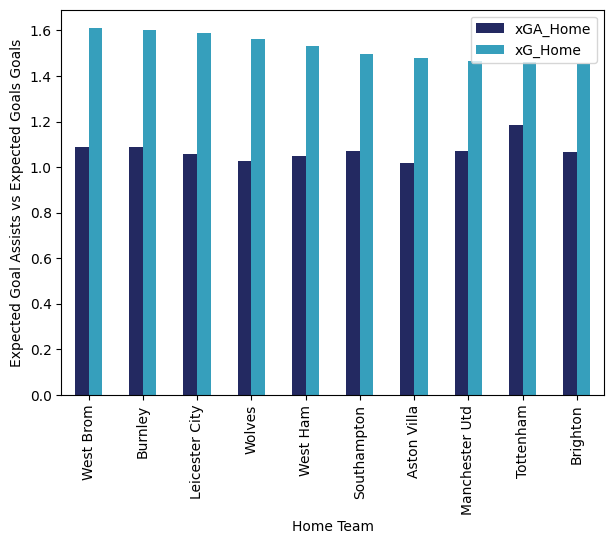

In [44]:
home_team = data.groupby('Home')[['xGA_Home','xG_Home']].mean()
home_team = pd.DataFrame(home_team)
home_team
home_team = home_team.sort_values('xG_Home', ascending=False)
home_team = home_team.reset_index()
home_team.head(10).plot(kind='bar', x='Home', y=['xGA_Home','xG_Home'], figsize=(7,5), color=['#232961','#369fbc'])
plt.xlabel('Home Team')
plt.ylabel('Expected Goal Assists vs Expected Goals Goals')


Bar Plot for Expected Goals vs Actual Goals of Top 10 Away Teams

Text(0, 0.5, 'Expected Goal Assists vs Expected Goals Goals')

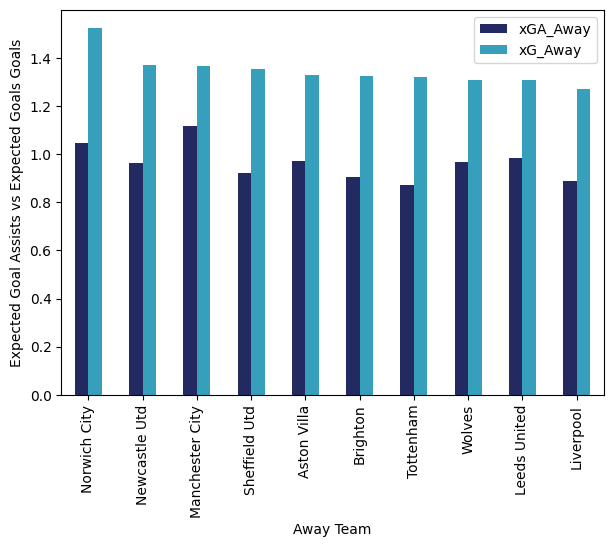

In [45]:

Away_team = data.groupby('Away')[['xGA_Away','xG_Away']].mean()
Away_team = pd.DataFrame(Away_team)
Away_team
Away_team = Away_team.sort_values('xG_Away', ascending=False)
Away_team = Away_team.reset_index()
Away_team.head(10).plot(kind='bar', x='Away', y=['xGA_Away','xG_Away'], figsize=(7,5),color=['#232961','#369fbc'])
plt.xlabel('Away Team')
plt.ylabel('Expected Goal Assists vs Expected Goals Goals')


Scatter plot for Expected Assisted Goals vs Expected Goals of Home Teams

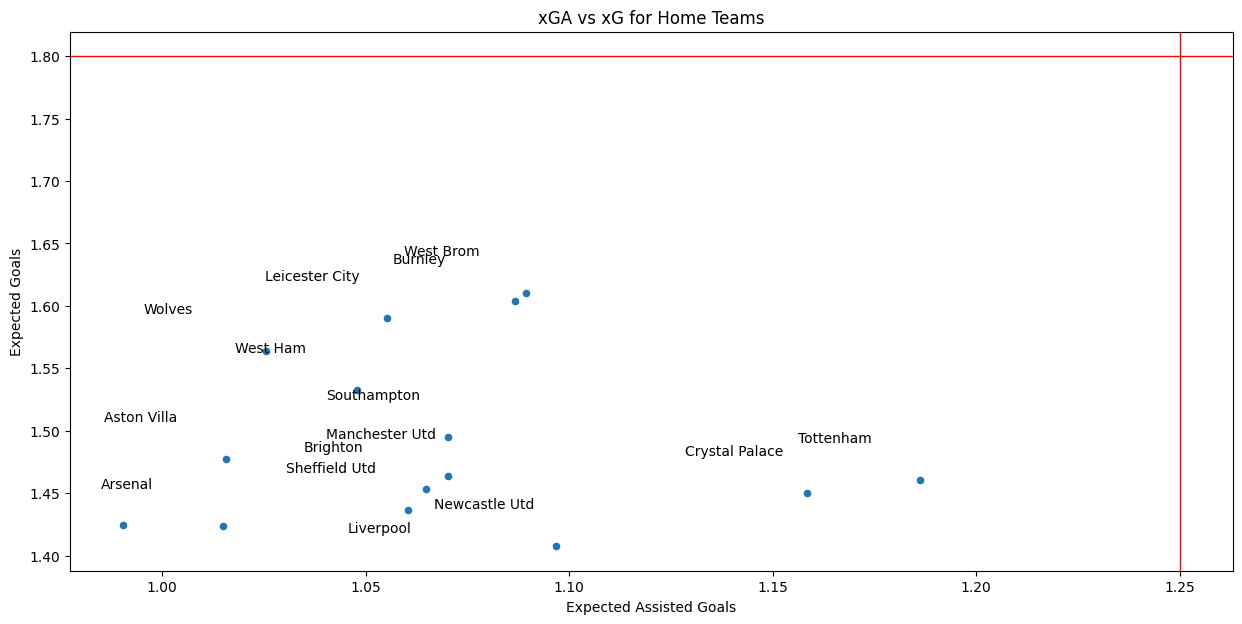

In [10]:


home_team = data.groupby('Home')[['xG_Home','xGA_Home']].mean()
home_team = pd.DataFrame(home_team)
home_team = home_team.sort_values('xG_Home', ascending=False)
home_team = home_team.reset_index()
home_team.head(15).plot(kind='scatter', x='xGA_Home', y='xG_Home', figsize=(15,7))
plt.xlabel('Expected Assisted Goals')
plt.ylabel('Expected Goals')
plt.title('xGA vs xG for Home Teams')
plt.axhline(y=1.8, color='r', linewidth=1)
plt.axvline(x=1.25, color='r', linewidth=1)

for i, txt in enumerate(home_team['Home']):
    plt.annotate(txt, (home_team['xGA_Home'][i] - 0.03, home_team['xG_Home'][i] + 0.03))




Scatter plot for Expected Assisted Goals vs Expected Goals of Away Teams

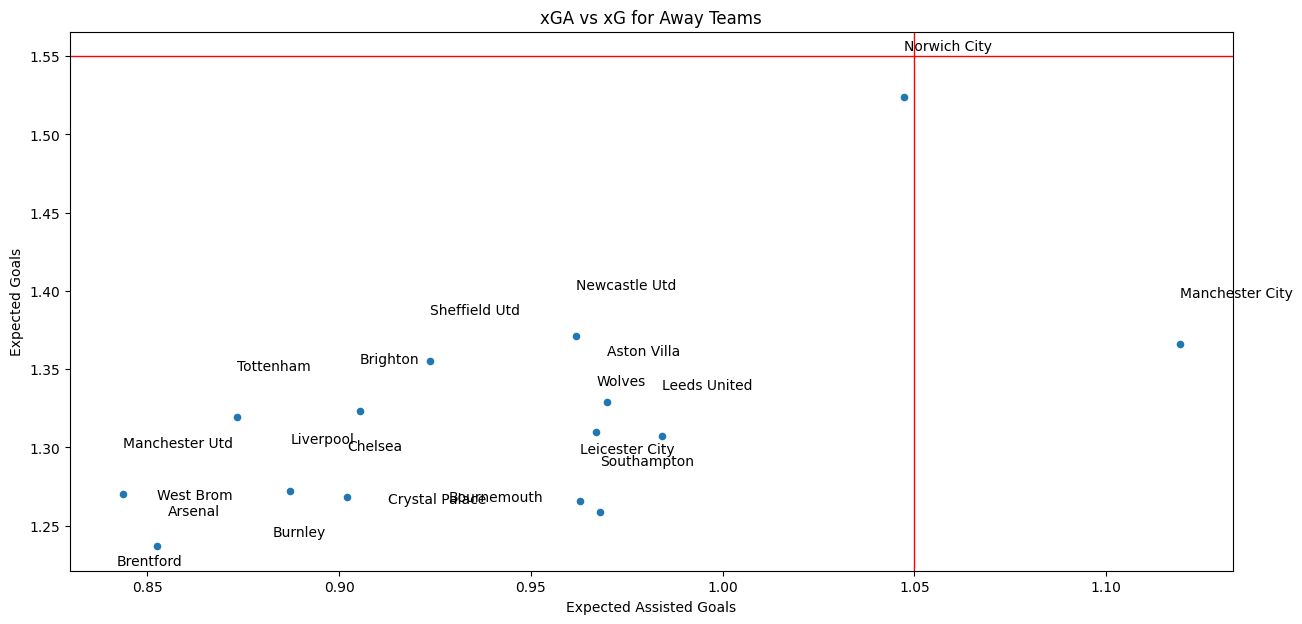

In [11]:

Away_team = data.groupby('Away')[['xG_Away','xGA_Away']].mean()
Away_team = pd.DataFrame(Away_team)
Away_team = Away_team.sort_values('xG_Away', ascending=False)
Away_team = Away_team.reset_index()
Away_team.head(15).plot(kind='scatter', x='xGA_Away', y='xG_Away', figsize=(15,7))
plt.xlabel('Expected Assisted Goals')
plt.ylabel('Expected Goals')
plt.title('xGA vs xG for Away Teams')
plt.axhline(y=1.55, color='r', linewidth=1)
plt.axvline(x=1.05, color='r', linewidth=1)


for i, txt in enumerate(Away_team['Away']):
    plt.annotate(txt, (Away_team['xGA_Away'][i], Away_team['xG_Away'][i] + 0.03))

Pie chart for referee bias value count

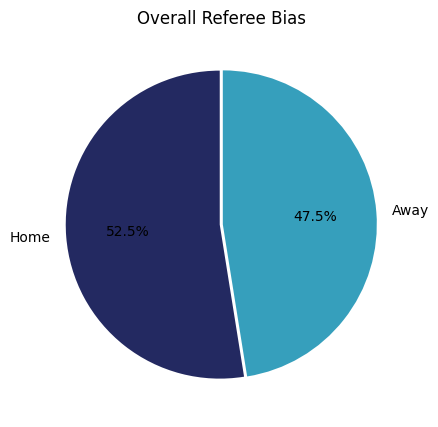

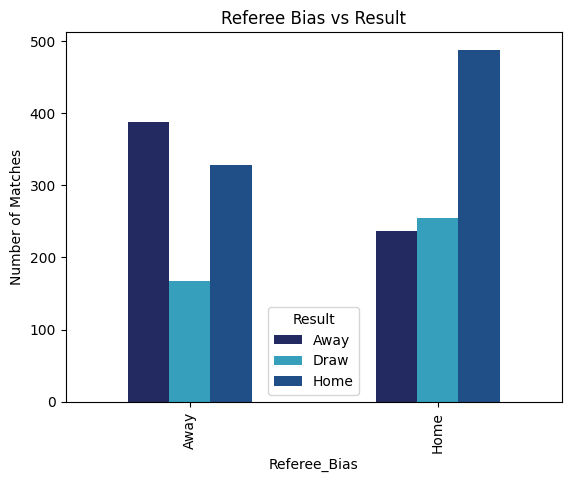

In [12]:

plt.figure(figsize=(10,5))
plt.pie(data['Referee_Bias'].value_counts(), labels=['Home','Away'], autopct='%1.1f%%', startangle=90,colors=['#232961','#369fbc'],explode=[0.01, 0.01])
plt.title('Overall Referee Bias')
crosstab = pd.crosstab(data['Referee_Bias'],data['Result'])
crosstab.plot.bar(color = ['#232961','#369fbc','#204e87'])
plt.title('Referee Bias vs Result')
plt.ylabel('Number of Matches')
plt.show()

Pie chart for home fatigue and away fatigue value count 

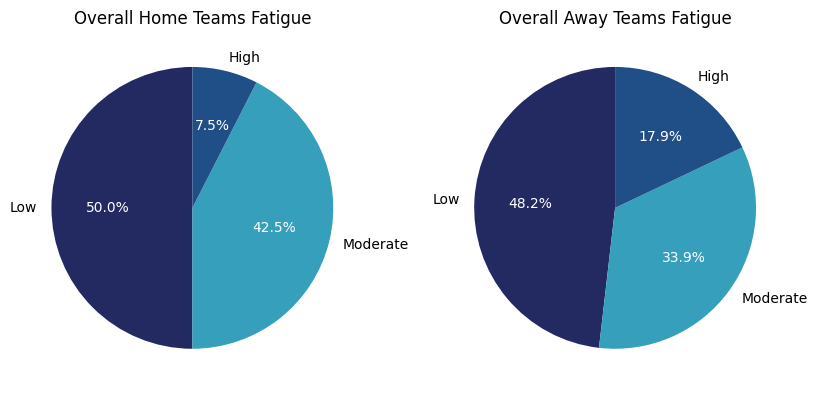

In [13]:


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
patches, texts, autotexts = plt.pie(data['Home_Fatigue'].value_counts(), labels=['Low','Moderate','High'], autopct='%1.1f%%',startangle=90,colors=['#232961','#369fbc','#204e87'])
plt.title('Overall Home Teams Fatigue')
[autotext.set_color('white') for autotext in autotexts]
plt.subplot(1,2,2)
patches, texts, autotexts = plt.pie(data['Away_Fatigue'].value_counts(), labels=['Low','Moderate','High'], autopct='%1.1f%%', startangle=90,colors=['#232961','#369fbc','#204e87'])
plt.title('Overall Away Teams Fatigue')
[autotext.set_color('white') for autotext in autotexts]
plt.show()



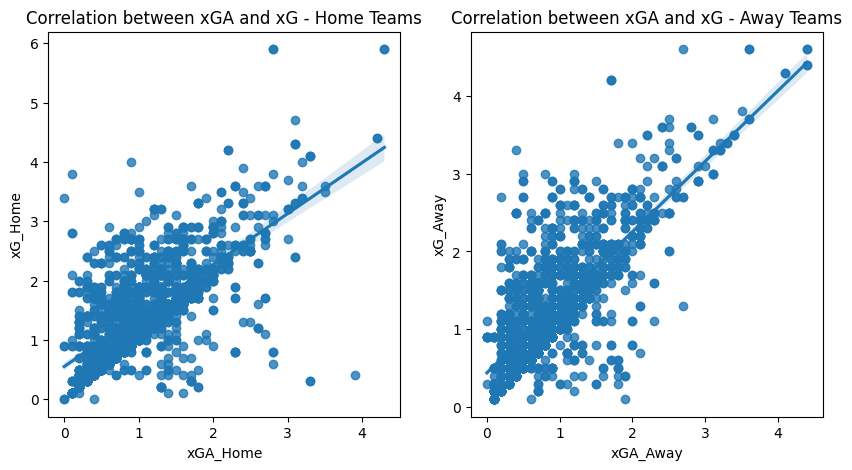

          xGA_Home   xG_Home
xGA_Home  1.000000  0.680235
xG_Home   0.680235  1.000000
          xGA_Away   xG_Away
xGA_Away  1.000000  0.755351
xG_Away   0.755351  1.000000


In [15]:
#correlation between expected home goals and actual home goals
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(x='xGA_Home', y='xG_Home', data=data)
plt.title('Correlation between xGA and xG - Home Teams')
plt.subplot(1,2,2)
sns.regplot(x='xGA_Away', y='xG_Away', data=data)
plt.title('Correlation between xGA and xG - Away Teams')
plt.show()

#correlation coeffieient between expected home goals and expected home goals
correlation1 = data[['xGA_Home','xG_Home']].corr()
print(correlation1)

#correlation coeffieient between expected away goals and actual away goals
correlation2 = data[['xGA_Away','xG_Away']].corr()
print(correlation2)

In [16]:
# plt.figure(figsize=(13,5))
# plt.subplot(1,3,1)
# sns.swarmplot(x="Temp", y="xG_Away", hue="Temp" ,data=data)
# plt.subplot(1,3,2)
# sns.swarmplot(x="Temp", y="xG_Home", hue="Temp" ,data=data)
# plt.show()




In [17]:
# plt.figure(figsize=(13,5))
# plt.subplot(1,3,1)
# sns.swarmplot(x="Humidity", y="xG_Away", hue="Humidity" ,data=data)
# plt.subplot(1,3,2)
# sns.swarmplot(x="Humidity", y="xG_Home", hue="Humidity" ,data=data)
# plt.show()




In [18]:
# plt.figure(figsize=(13,5))
# plt.subplot(1,3,1)
# sns.swarmplot(x="Wind", y="xG_Away", hue="Wind" ,data=data)
# plt.subplot(1,3,2)
# sns.swarmplot(x="Wind", y="xG_Home", hue="Wind" ,data=data)
# plt.show()




In [19]:



# # Subplot for xG_Home
# fig, axes = plt.subplots(2, 1,figsize=(12, 8))
# sns.pointplot(x='Referee_Bias', y='xG_Home', data=data,  ci='sd', ax=axes[0])
# # plt.title('xG_Home by Referee_Bias')
# # plt.xlabel('Referee_Bias')
# # plt.ylabel('xG_Home')

# # Subplot for xG_Away
# sns.pointplot(x='Referee_Bias', y='xGA_Home', data=data,  ci='sd', ax=axes[1])
# # plt.title('xG_Away by Result')
# # plt.xlabel('Result')
# # plt.ylabel('xG_Away')

# # sns.pointplot(x='Result', y='xGA_Away', data=data,  ci='sd', ax=axes[1,0])
# # # plt.title('xGA_Away by Result')
# # # plt.xlabel('Result')
# # # plt.ylabel('xGA_Away')


# # sns.pointplot(x='Result', y='xGA_Home', data=data,  ci='sd', ax=axes[1,1])
# # # plt.title('xGA_Home by Result')
# # # plt.xlabel('Result')
# # # plt.ylabel('xGA_Home')




In [20]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data
num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:
        model = ols(f'{home_level} ~ Referee_Bias', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Referee_Bias']
        p_value = anova_results['PR(>F)']['Referee_Bias']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\4001309981.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\4001309981.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\4001309981.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,28.630220,9.843715e-08,0.015159
0,xG_Away,6.155901,1.318523e-02,0.003299
0,xGA_Home,15.686063,7.759138e-05,0.008363
0,xGA_Away,0.708775,3.999591e-01,0.000381


In [21]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Home_Fatigue', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Home_Fatigue']
        p_value = anova_results['PR(>F)']['Home_Fatigue']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\2796385453.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\2796385453.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\2796385453.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,0.298526,0.741947,0.000321
0,xG_Away,1.565215,0.209319,0.001681
0,xGA_Home,0.393769,0.674566,0.000423
0,xGA_Away,2.613168,0.073571,0.002803


In [22]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Away_Fatigue', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Away_Fatigue']
        p_value = anova_results['PR(>F)']['Away_Fatigue']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\2577399383.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\2577399383.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\2577399383.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,5.592132,0.003790,0.005980
0,xG_Away,3.739527,0.023944,0.004007
0,xGA_Home,1.672704,0.188021,0.001796
0,xGA_Away,2.233994,0.107387,0.002398


In [23]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Temp', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Temp']
        p_value = anova_results['PR(>F)']['Temp']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\3831054091.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\3831054091.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\3831054091.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,6.841810,0.001095,0.007307
0,xG_Away,2.545054,0.078742,0.002731
0,xGA_Home,2.220969,0.108792,0.002384
0,xGA_Away,4.064852,0.017318,0.004354


In [24]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Humidity', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Humidity']
        p_value = anova_results['PR(>F)']['Humidity']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\1208712932.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\1208712932.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\1208712932.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,1.262189,0.283276,0.001356
0,xG_Away,3.290467,0.037453,0.003528
0,xGA_Home,0.700058,0.496687,0.000753
0,xGA_Away,2.349366,0.095713,0.002521


In [25]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Wind', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Wind']
        p_value = anova_results['PR(>F)']['Wind']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\1808189195.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\1808189195.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\1808189195.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,0.195394,0.822527,0.000210
0,xG_Away,1.500882,0.223204,0.001612
0,xGA_Home,0.629278,0.533090,0.000677
0,xGA_Away,1.420204,0.241927,0.001526


In [26]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Referee_Bias']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Referee Bias.")
else:
    print("There is no significant association between Football Result and Referee Bias.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result        Away  Draw  Home
Referee_Bias                  
Away           388   168   328
Home           236   254   488


Chi-square statistic: 81.38623980745922
P-value: 2.1242350692551324e-18

Significance Test:
There is a significant association between Football Result and Referee Bias.


Result        Away  Draw  Home
Home_Fatigue                  
High            38    33    69
Low            326   209   396
Moderate       260   180   351


Chi-square statistic: 3.8539594495862795
P-value: 0.426130925078535

Significance Test:
There is no significant association between Football Result and Home_Fatigue.


<Axes: xlabel='Home_Fatigue'>

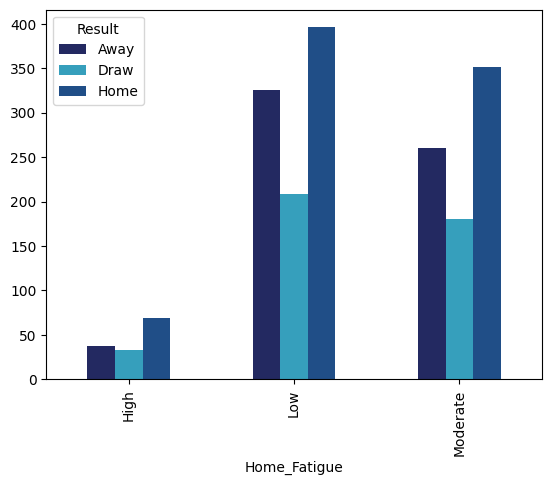

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Home_Fatigue']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Home_Fatigue.")
else:
    print("There is no significant association between Football Result and Home_Fatigue.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Away_Fatigue']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Away_Fatigue.")
else:
    print("There is no significant association between Football Result and Away_Fatigue.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result        Away  Draw  Home
Away_Fatigue                  
High            98    76   160
Low            198   149   284
Moderate       328   197   372


Chi-square statistic: 8.137919666458481
P-value: 0.08665468486298128

Significance Test:
There is no significant association between Football Result and Away_Fatigue.


In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Temp']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Temperature.")
else:
    print("There is no significant association between Football Result and Temperature.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result    Away  Draw  Home
Temp                      
High         4    11    20
Low        255   190   332
Moderate   365   221   464


Chi-square statistic: 10.8500089381376
P-value: 0.02830244329031384

Significance Test:
There is a significant association between Football Result and Temperature.


In [30]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Humidity']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Humidity.")
else:
    print("There is no significant association between Football Result and Humidity.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result    Away  Draw  Home
Humidity                  
High       373   266   499
Low         14    13    28
Moderate   237   143   289


Chi-square statistic: 3.436823362661548
P-value: 0.4875492771740987

Significance Test:
There is no significant association between Football Result and Humidity.


In [31]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Wind']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Wind.")
else:
    print("There is no significant association between Football Result and Wind.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result    Away  Draw  Home
Wind                      
High        47    30    52
Low        305   235   441
Moderate   272   157   323


Chi-square statistic: 6.210545950139427
P-value: 0.18396665949537094

Significance Test:
There is no significant association between Football Result and Wind.


In [33]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest


df = data


fatigue_levels = ["Low", "Moderate", "High"]

z_test_results = pd.DataFrame(columns=['Home_Fatigue','Away_Fatigue','Z-Statistic', 'P-Value','Significant Difference'])

for home_level in fatigue_levels:
    for away_level in fatigue_levels:

        home_data = df[df["Home_Fatigue"] == home_level]["xG_Home"]
        away_data = df[df["Away_Fatigue"] == away_level]["xG_Away"]


        z_stat, p_value = ztest(home_data, away_data)
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        
        new_row = pd.DataFrame([{'Home_Fatigue':home_level,'Away_Fatigue':away_level,'Z-Statistic': z_stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
        z_test_results = pd.concat([z_test_results, new_row])

z_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\3194791706.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  z_test_results = pd.concat([z_test_results, new_row])


,Home_Fatigue,Away_Fatigue,Z-Statistic,P-Value,Significant Difference
0,Low,Low,5.189255,2.111376e-07,Yes
0,Low,Moderate,2.690682,7.130620e-03,Yes
0,Low,High,3.591980,3.281757e-04,Yes
0,Moderate,Low,5.174042,2.290839e-07,Yes
0,Moderate,Moderate,2.968481,2.992753e-03,Yes
0,Moderate,High,3.618912,2.958446e-04,Yes
0,High,Low,3.324923,8.844295e-04,Yes
0,High,Moderate,1.973648,4.842182e-02,Yes
0,High,High,2.585531,9.722909e-03,Yes


C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\3520716755.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\3520716755.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\3520716755.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, 

  Home_Fatigue Away_Fatigue            Test Type  Statistic       P-Value  \
0          Low          Low  Mann-Whitney U Test   346626.5  1.420882e-09   
1          Low     Moderate  Mann-Whitney U Test   453740.5  1.325245e-03   
2          Low         High  Mann-Whitney U Test   178969.0  4.038032e-05   
3     Moderate          Low  Mann-Whitney U Test   291262.0  5.761336e-08   
4     Moderate     Moderate  Mann-Whitney U Test   382019.0  6.336896e-03   
5     Moderate         High  Mann-Whitney U Test   150724.5  1.805911e-04   
6         High          Low  Mann-Whitney U Test    48717.5  5.619131e-02   
7         High     Moderate  Mann-Whitney U Test    65217.5  4.610801e-01   
8         High         High  Mann-Whitney U Test    25473.5  1.235631e-01   

  Significant Difference  
0                    Yes  
1                    Yes  
2                    Yes  
3                    Yes  
4                    Yes  
5                    Yes  
6                     No  
7            

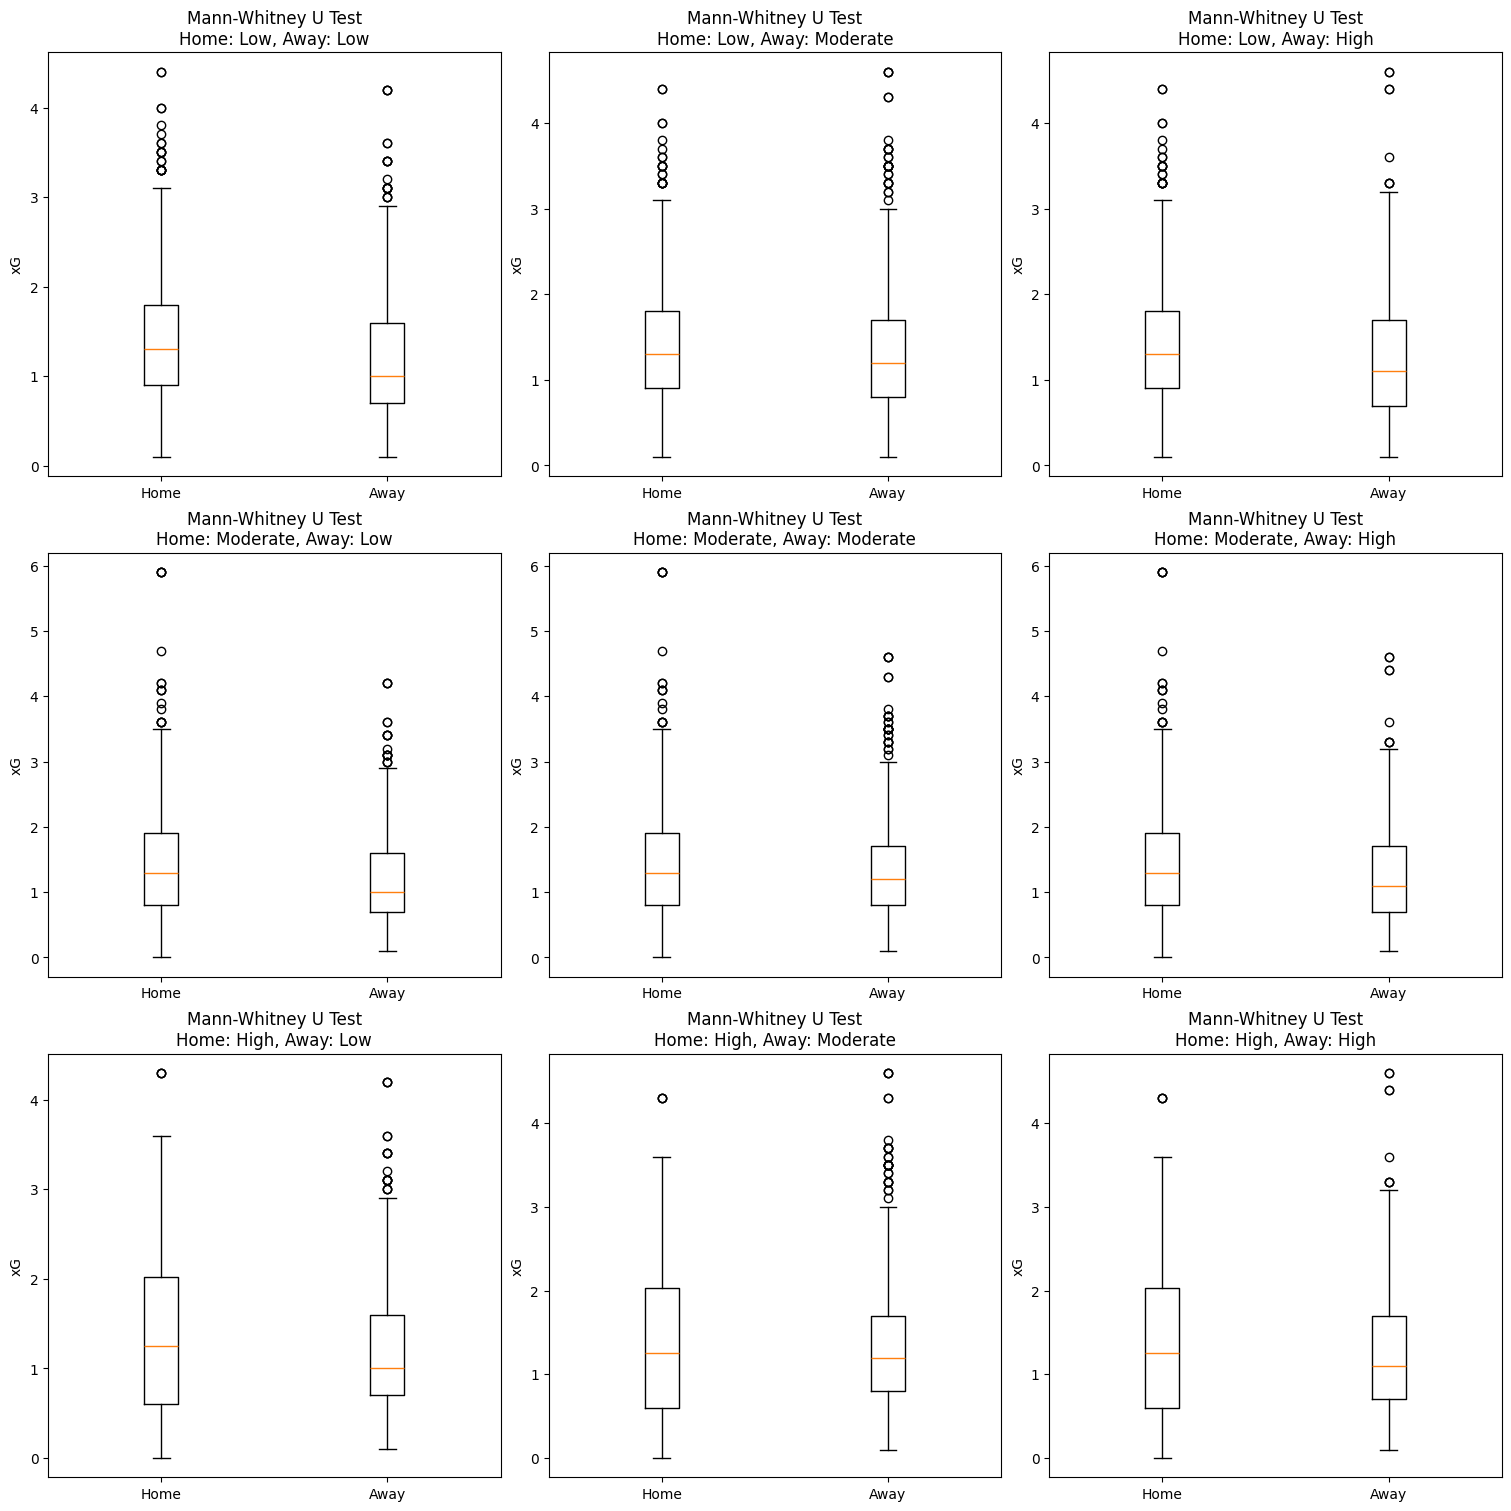

In [61]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
fatigue_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Home_Fatigue', 'Away_Fatigue', 'Test Type', 'Statistic', 'P-Value', 'Significant Difference'])

fig, axes = plt.subplots(nrows=len(fatigue_levels), ncols=len(fatigue_levels), figsize=(15, 15), constrained_layout=True)

for i, home_level in enumerate(fatigue_levels):
    for j, away_level in enumerate(fatigue_levels):
        home_data = df[df["Home_Fatigue"] == home_level]["xG_Home"]
        away_data = df[df["Away_Fatigue"] == away_level]["xG_Away"]

        # Check for normality
        home_normality = normaltest(home_data)
        away_normality = normaltest(away_data)

        if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
            # Perform z-test if both samples are normally distributed
            test_type = 'Z-Test'
            z_stat, p_value = ztest(home_data, away_data)
            stat = z_stat
        else:
            # Perform Mann-Whitney U test if at least one sample is not normally distributed
            test_type = 'Mann-Whitney U Test'
            u_stat, p_value = mannwhitneyu(home_data, away_data)
            stat = u_stat

        significant_diff = "Yes" if p_value < 0.05 else "No"

        new_row = pd.DataFrame([{'Home_Fatigue': home_level, 'Away_Fatigue': away_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
        results = pd.concat([results, new_row], ignore_index=True)

        # Plot the data
        axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
        axes[i, j].set_title(f'{test_type}\nHome: {home_level}, Away: {away_level}')
        axes[i, j].set_ylabel('xG')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\2867954313.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\2867954313.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\2867954313.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, 

  Home_Fatigue Away_Fatigue            Test Type  Statistic       P-Value  \
0          Low          Low  Mann-Whitney U Test   340282.5  9.716992e-08   
1          Low     Moderate  Mann-Whitney U Test   456266.0  5.875796e-04   
2          Low         High  Mann-Whitney U Test   169947.0  1.137259e-02   
3     Moderate          Low  Mann-Whitney U Test   288735.0  3.374264e-07   
4     Moderate     Moderate  Mann-Whitney U Test   388356.5  7.595156e-04   
5     Moderate         High  Mann-Whitney U Test   144577.0  1.204428e-02   
6         High          Low  Mann-Whitney U Test    48737.0  5.493939e-02   
7         High     Moderate  Mann-Whitney U Test    66211.0  2.985350e-01   
8         High         High  Mann-Whitney U Test    24571.0  3.806410e-01   

  Significant Difference  
0                    Yes  
1                    Yes  
2                    Yes  
3                    Yes  
4                    Yes  
5                    Yes  
6                     No  
7            

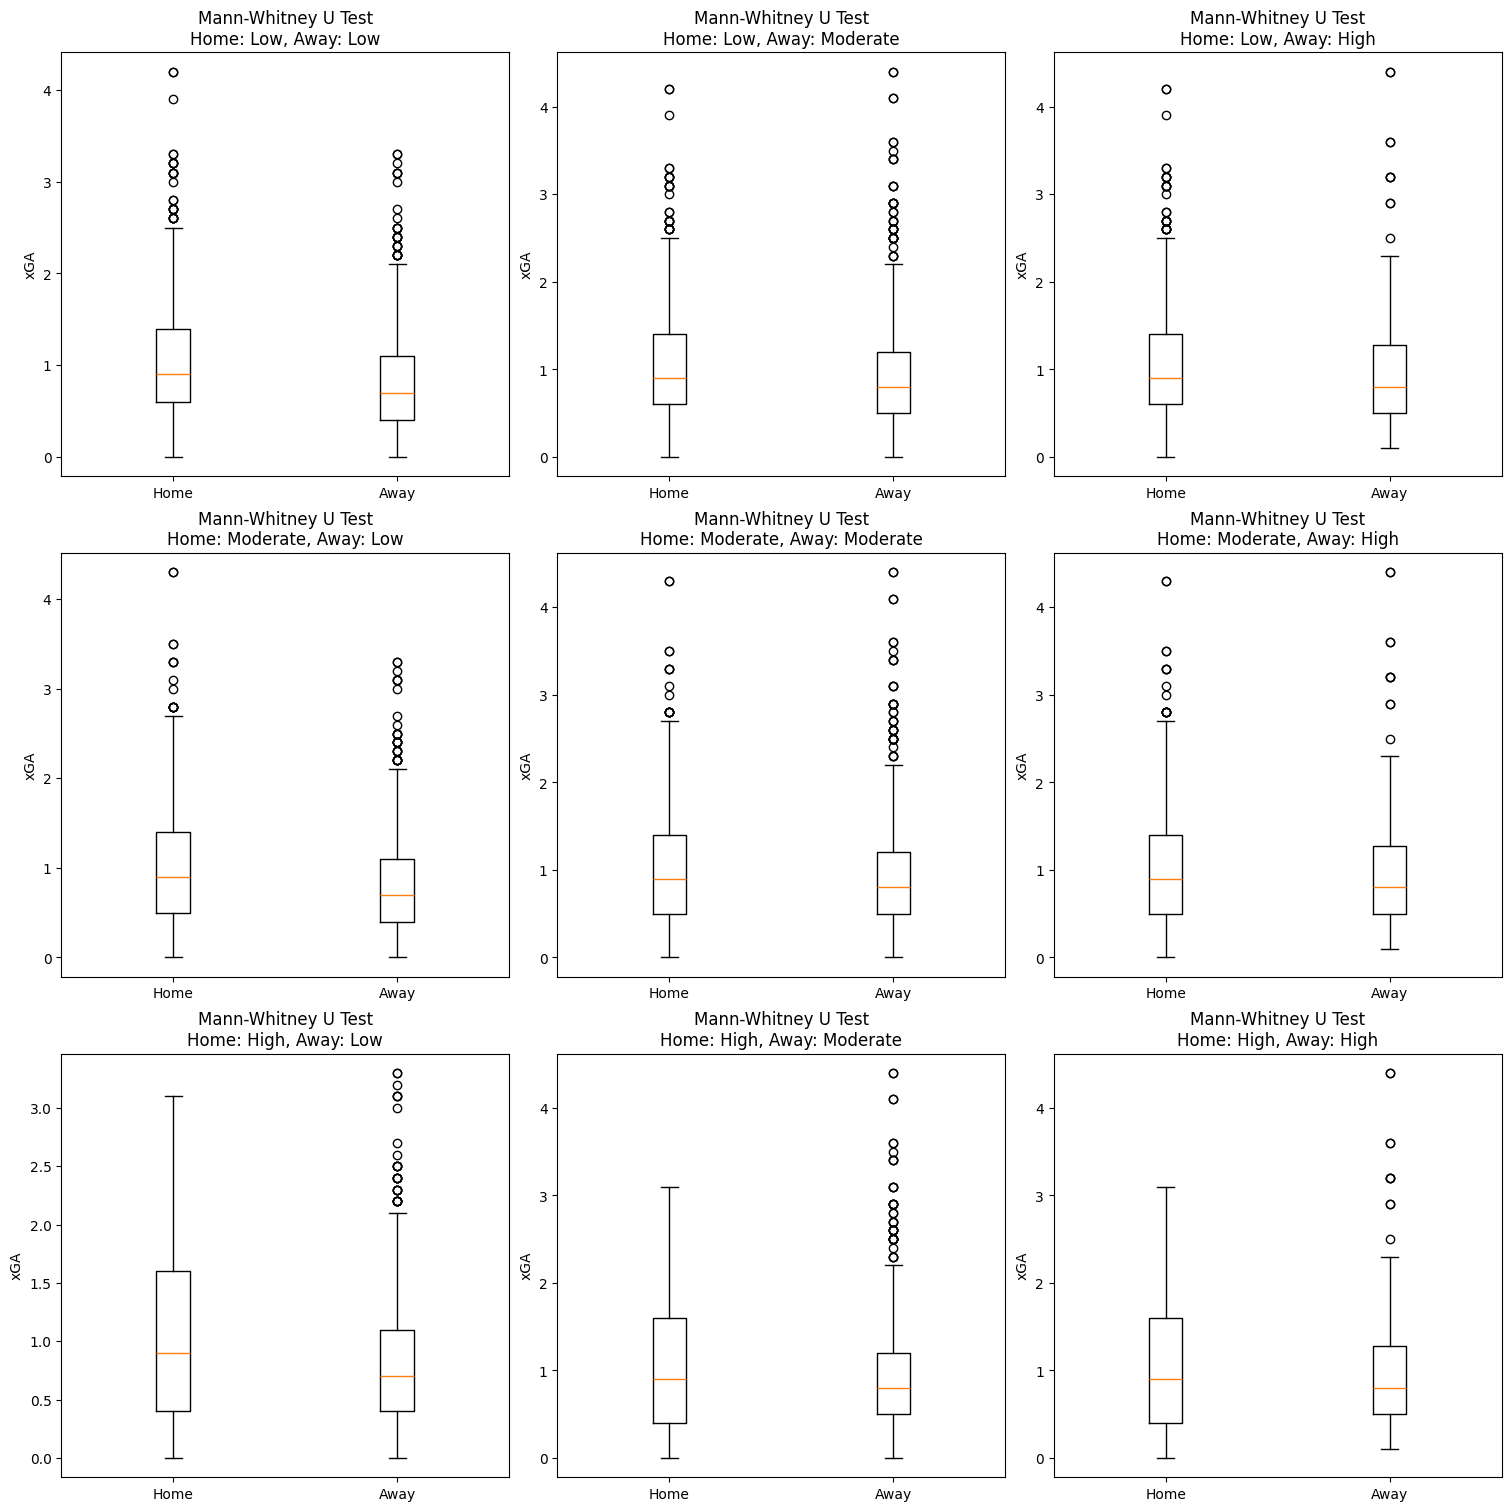

In [62]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt



fatigue_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Home_Fatigue', 'Away_Fatigue', 'Test Type', 'Statistic', 'P-Value', 'Significant Difference'])

fig, axes = plt.subplots(nrows=len(fatigue_levels), ncols=len(fatigue_levels), figsize=(15, 15), constrained_layout=True)

for i, home_level in enumerate(fatigue_levels):
    for j, away_level in enumerate(fatigue_levels):
        home_data = df[df["Home_Fatigue"] == home_level]["xGA_Home"]
        away_data = df[df["Away_Fatigue"] == away_level]["xGA_Away"]

        # Check for normality
        home_normality = normaltest(home_data)
        away_normality = normaltest(away_data)

        if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
            # Perform z-test if both samples are normally distributed
            test_type = 'Z-Test'
            z_stat, p_value = ztest(home_data, away_data)
            stat = z_stat
        else:
            # Perform Mann-Whitney U test if at least one sample is not normally distributed
            test_type = 'Mann-Whitney U Test'
            u_stat, p_value = mannwhitneyu(home_data, away_data)
            stat = u_stat

        significant_diff = "Yes" if p_value < 0.05 else "No"

        new_row = pd.DataFrame([{'Home_Fatigue': home_level, 'Away_Fatigue': away_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
        results = pd.concat([results, new_row], ignore_index=True)

        # Plot the data
        axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
        axes[i, j].set_title(f'{test_type}\nHome: {home_level}, Away: {away_level}')
        axes[i, j].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\3113352540.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


  Humidity            Test Type      Statistic   P-Value  \
0      NaN  Mann-Whitney U Test  342125.500000  0.000005   
1      NaN  Mann-Whitney U Test  597630.500000  0.000826   
2      NaN               Z-Test       3.400463  0.000673   

  Significant Difference      Temp  
0                    Yes       Low  
1                    Yes  Moderate  
2                    Yes      High  


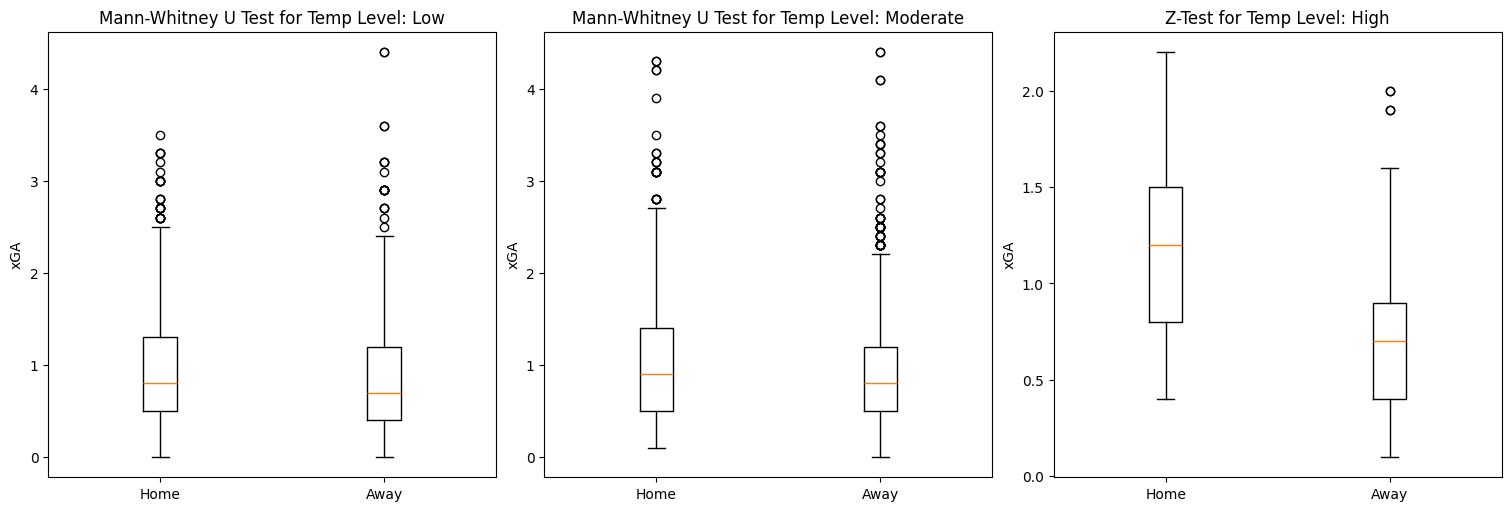

In [54]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Temp"] == home_level]["xGA_Home"]
    away_data = df[df["Temp"] == home_level]["xGA_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Temp': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Temp Level: {home_level}')
    axes[i].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\2281937181.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


   Humidity            Test Type      Statistic       P-Value  \
0       Low               Z-Test       1.086224  2.773800e-01   
1  Moderate  Mann-Whitney U Test  248362.500000  4.987951e-04   
2      High  Mann-Whitney U Test  729980.500000  1.399735e-07   

  Significant Difference  
0                     No  
1                    Yes  
2                    Yes  


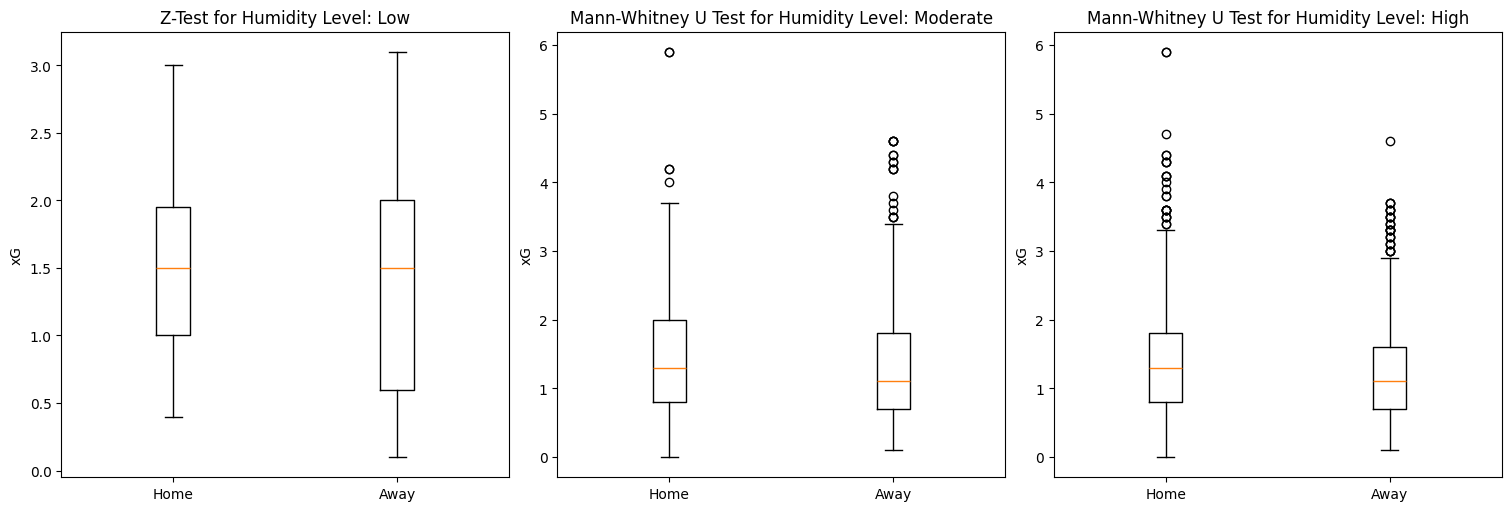

In [56]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Humidity"] == home_level]["xG_Home"]
    away_data = df[df["Humidity"] == home_level]["xG_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Humidity': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Humidity Level: {home_level}')
    axes[i].set_ylabel('xG')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\1647458132.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


   Humidity            Test Type  Statistic   P-Value Significant Difference
0       Low  Mann-Whitney U Test     2061.0  0.001021                    Yes
1  Moderate  Mann-Whitney U Test   246819.5  0.001091                    Yes
2      High  Mann-Whitney U Test   714337.0  0.000020                    Yes


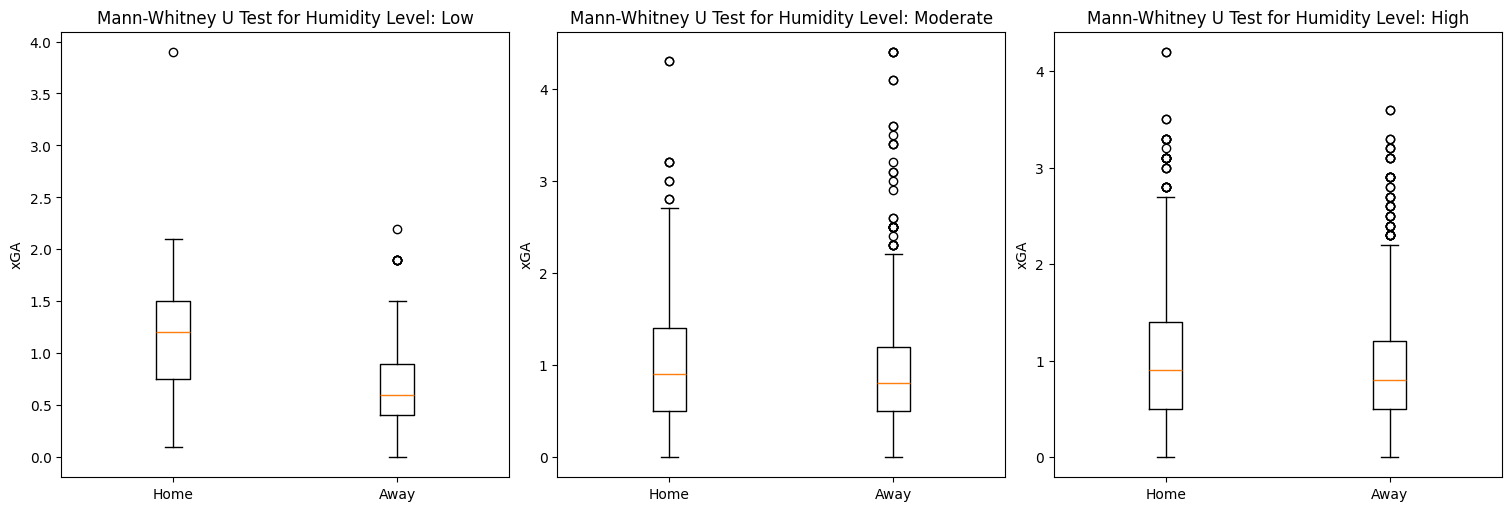

In [57]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Humidity"] == home_level]["xGA_Home"]
    away_data = df[df["Humidity"] == home_level]["xGA_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Humidity': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Humidity Level: {home_level}')
    axes[i].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\3640864810.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


  Humidity            Test Type  Statistic   P-Value Significant Difference  \
0      NaN  Mann-Whitney U Test   533093.0  0.000035                    Yes   
1      NaN  Mann-Whitney U Test   317900.0  0.000030                    Yes   
2      NaN  Mann-Whitney U Test    10150.0  0.002238                    Yes   

       Wind  
0       Low  
1  Moderate  
2      High  


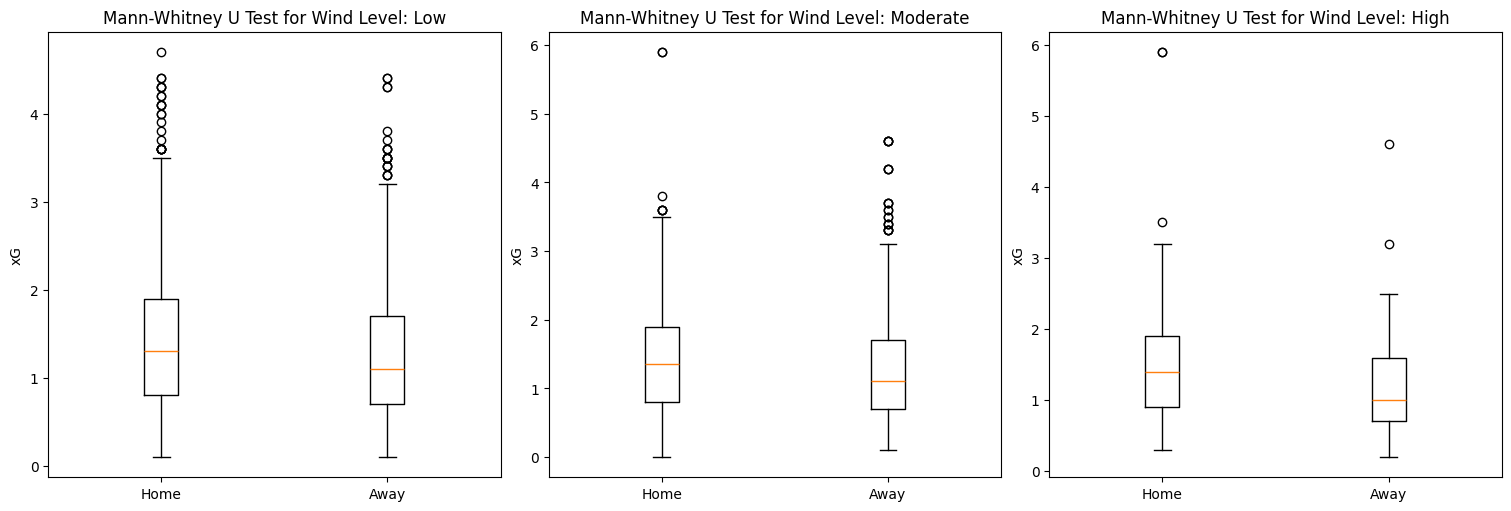

In [58]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Wind"] == home_level]["xG_Home"]
    away_data = df[df["Wind"] == home_level]["xG_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Wind': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Wind Level: {home_level}')
    axes[i].set_ylabel('xG')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_10904\2676737873.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


  Humidity            Test Type  Statistic   P-Value Significant Difference  \
0      NaN  Mann-Whitney U Test   537946.0  0.000006                    Yes   
1      NaN  Mann-Whitney U Test   303455.0  0.013796                    Yes   
2      NaN  Mann-Whitney U Test    10750.5  0.000048                    Yes   

       Wind  
0       Low  
1  Moderate  
2      High  


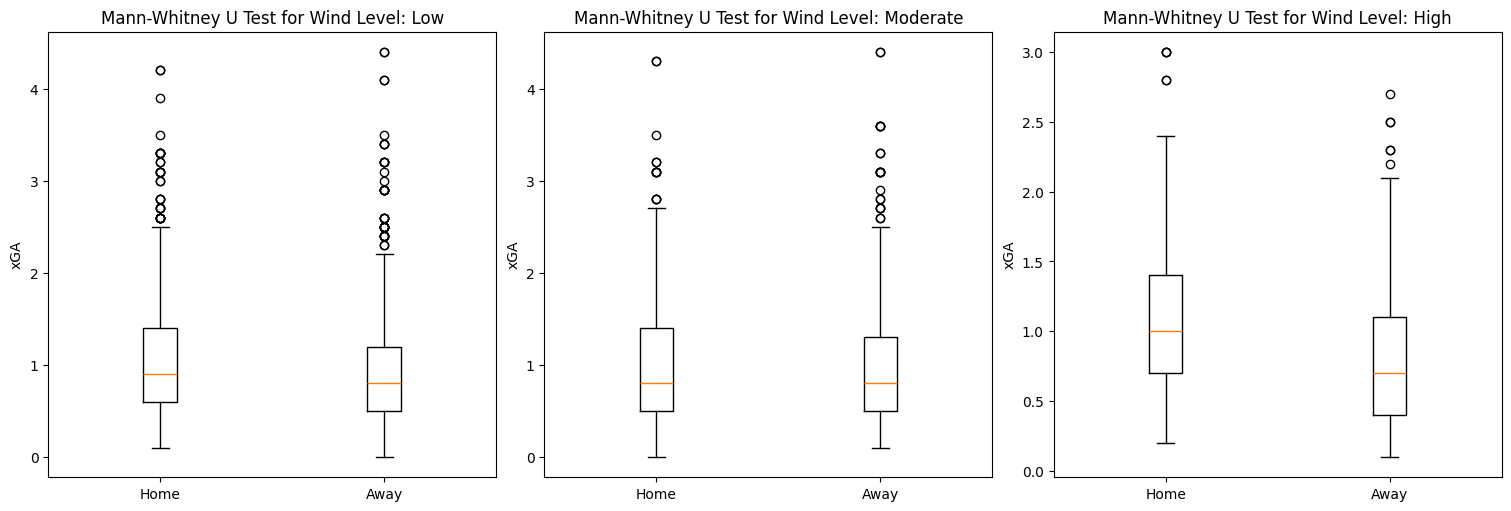

In [59]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Wind"] == home_level]["xGA_Home"]
    away_data = df[df["Wind"] == home_level]["xGA_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Wind': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Wind Level: {home_level}')
    axes[i].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()
